In [2]:
import numpy as np 
import pandas as pd

In [3]:
df = pd.read_csv("titanic.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<Axes: xlabel='Age'>

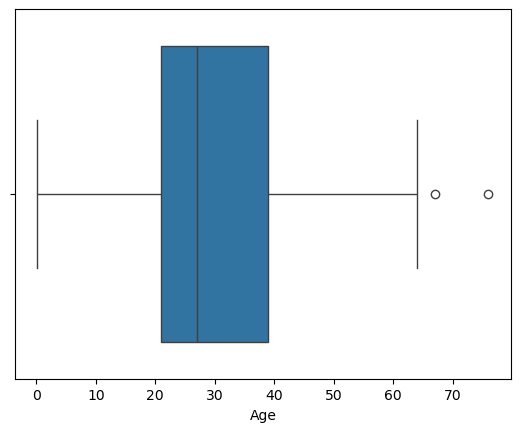

In [14]:
sns.boxplot(x=df['Age'])  # Replace 'Age' with the desired column name if needed

In [15]:
# finding the Irq = inter quartile range
percentile25 = df['Age'].quantile(0.25)
percentile75 = df['Age'].quantile(0.75)

In [16]:
percentile75

39.0

In [17]:
percentile25

21.0

In [18]:
IQR = percentile75 - percentile25
print("IQR:", IQR)

IQR: 18.0


In [20]:
upper_limit = percentile75 - 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR
print(upper_limit)
print(lower_limit)

12.0
-6.0


In [ ]:
# finding outlliers

In [44]:
df[df["Age"]<upper_limit].shape

(23, 12)

In [43]:
# trimming
newdf = df[df['Age']<upper_limit]

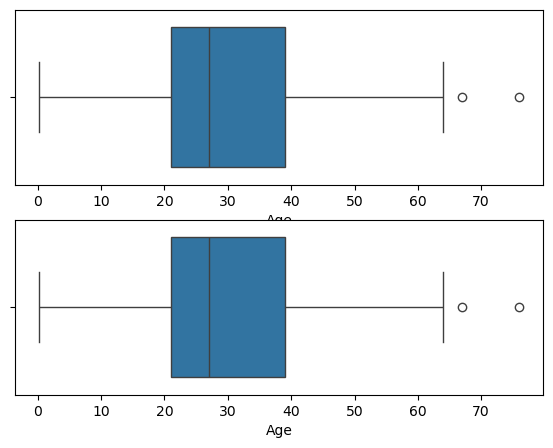

In [34]:
plt.figure(figsize = (15,5))


plt.subplot(222)
sns.boxplot(x=df['Age'])

plt.subplot(224)
sns.boxplot(x=df['Age'])
plt.show()

In [35]:
new_df_cap = newdf.copy()  # Create a copy of newdf
new_df_cap['Age'] = np.where(
	new_df_cap['Age'] > upper_limit, 
	upper_limit, 
	np.where(new_df_cap['Age'] < lower_limit, lower_limit, new_df_cap['Age'])
)

In [36]:
new_df_cap.shape

(23, 12)

<function matplotlib.pyplot.show(close=None, block=None)>

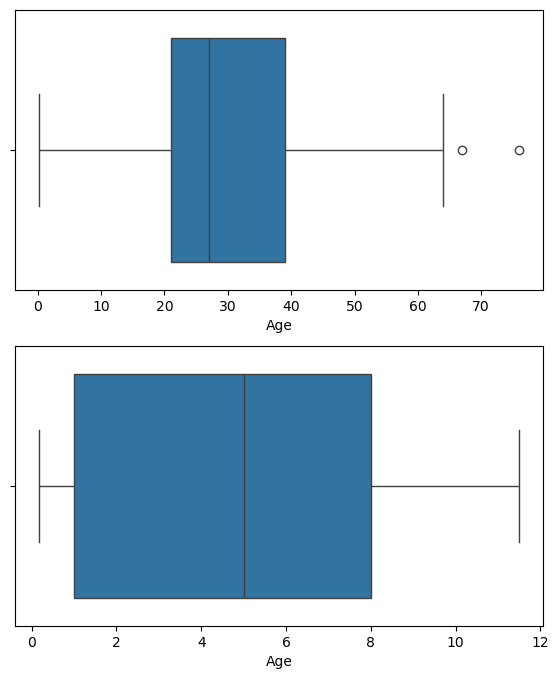

In [38]:
plt. figure(figsize = (15,8))
plt.subplot(222)
sns.boxplot(x=df["Age"])
plt.subplot (224)
sns.boxplot(x=new_df_cap['Age'])
plt.show